# Regression Model for Predicting Housing Prices

## [Dataset](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv)

> !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv



In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-30 10:26:36--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  3.65MB/s    in 0.4s    

2023-09-30 10:26:38 (3.65 MB/s) - ‘housing.csv’ saved [1423529/1423529]



## Loading the data

In [4]:
import pandas as pd

selected_col = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

df_orig = pd.read_csv('housing.csv')
df = df_orig[selected_col]

In [5]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Fill NAs with 0.

In [6]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.fillna(value=0, inplace=True)

In [8]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Apply the log tranform to `median_house_value`

In [10]:
import numpy as np

df['median_house_value'] = np.log1p(df['median_house_value'])

In [11]:
df['median_house_value'].head()

0    13.022766
1    12.789687
2    12.771673
3    12.740520
4    12.743154
Name: median_house_value, dtype: float64

## Do train/validation/test split with 60%/20%/20% distribution.

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [16]:
df_train.size, df_val.size, df_test.size

(123840, 41280, 41280)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train['median_house_value']
y_val = df_val['median_house_value']
y_test = df_test['median_house_value']

In [19]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#### Use DictVectorizer to turn the dataframe into matrices.

In [20]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [21]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [22]:
df_test

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,34.06,-118.36,39.0,2810.0,670.0,1109.0,624.0,3.2500,<1H OCEAN
1,36.78,-119.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,INLAND
2,37.73,-122.42,46.0,1819.0,411.0,1534.0,406.0,4.0132,NEAR BAY
3,37.81,-122.28,52.0,340.0,97.0,200.0,87.0,1.5208,NEAR BAY
4,33.82,-118.13,37.0,1530.0,290.0,711.0,283.0,5.1795,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
4123,36.82,-119.70,25.0,2379.0,540.0,1482.0,484.0,2.3173,INLAND
4124,34.04,-118.44,49.0,32.0,7.0,14.0,7.0,2.1875,<1H OCEAN
4125,37.60,-122.37,26.0,15.0,3.0,11.0,3.0,5.0480,NEAR OCEAN
4126,34.09,-118.10,42.0,1460.0,289.0,829.0,273.0,4.8750,<1H OCEAN


In [23]:
test_dicts = df_test.to_dict(orient='records')
test_dicts

[{'latitude': 34.06,
  'longitude': -118.36,
  'housing_median_age': 39.0,
  'total_rooms': 2810.0,
  'total_bedrooms': 670.0,
  'population': 1109.0,
  'households': 624.0,
  'median_income': 3.25,
  'ocean_proximity': '<1H OCEAN'},
 {'latitude': 36.78,
  'longitude': -119.78,
  'housing_median_age': 37.0,
  'total_rooms': 2185.0,
  'total_bedrooms': 455.0,
  'population': 1143.0,
  'households': 438.0,
  'median_income': 1.9784,
  'ocean_proximity': 'INLAND'},
 {'latitude': 37.73,
  'longitude': -122.42,
  'housing_median_age': 46.0,
  'total_rooms': 1819.0,
  'total_bedrooms': 411.0,
  'population': 1534.0,
  'households': 406.0,
  'median_income': 4.0132,
  'ocean_proximity': 'NEAR BAY'},
 {'latitude': 37.81,
  'longitude': -122.28,
  'housing_median_age': 52.0,
  'total_rooms': 340.0,
  'total_bedrooms': 97.0,
  'population': 200.0,
  'households': 87.0,
  'median_income': 1.5208,
  'ocean_proximity': 'NEAR BAY'},
 {'latitude': 33.82,
  'longitude': -118.13,
  'housing_median_age'

In [24]:
X_test = dv.transform(test_dicts)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity=INLAND`
* `total_rooms`
* `latitude`
* `population`

In [28]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [26]:
dtr = DecisionTreeRegressor(max_depth=1)

In [27]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [30]:
print(export_text(dtr, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



> **Answer** `ocean_proximity=INLAND <= 0.50`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster) It helps in training parallel by utilizing all available `cpu's`


What's the RMSE of this model on validation?

* 0.05
* 0.25
* 0.55
* 0.85

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [33]:
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_val)

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)

In [36]:
rmse = np.sqrt(mse)
round(rmse, 2)

0.25

> **Answer** `0.25`

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 150

In [38]:
def rmse(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    return np.sqrt(mse)

In [41]:
scores = []
for estimator in range(10, 201, 10):
    rfr = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    rmse_value = round(rmse(y_val, y_pred), 2)
    scores.append({"estimator": estimator, "rmse_score": rmse_value})


In [43]:
acc_score = [(score["estimator"], score["rmse_score"]) for score in scores]

In [44]:
acc_score

[(10, 0.25),
 (20, 0.24),
 (30, 0.24),
 (40, 0.23),
 (50, 0.23),
 (60, 0.23),
 (70, 0.23),
 (80, 0.23),
 (90, 0.23),
 (100, 0.23),
 (110, 0.23),
 (120, 0.23),
 (130, 0.23),
 (140, 0.23),
 (150, 0.23),
 (160, 0.23),
 (170, 0.23),
 (180, 0.23),
 (190, 0.23),
 (200, 0.23)]

In [45]:
df_scores = pd.DataFrame(acc_score, columns=['n_estimators', 'acc'])

In [46]:
df_scores

,n_estimators,acc
0,10,0.25
1,20,0.24
2,30,0.24
3,40,0.23
4,50,0.23
5,60,0.23
6,70,0.23
7,80,0.23
8,90,0.23
9,100,0.23


In [49]:
from matplotlib import pyplot as plt

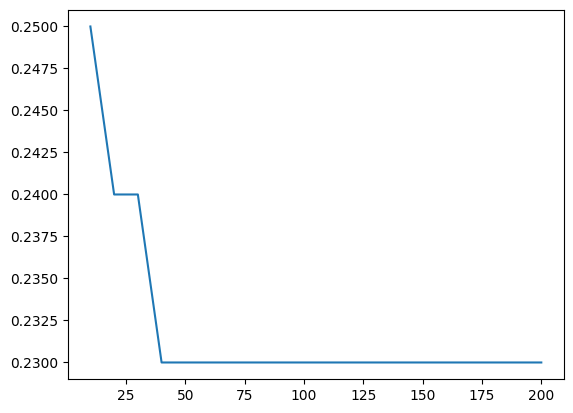

In [50]:
plt.plot(df_scores.n_estimators, df_scores.acc)

> **Answer** `40`

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25

In [54]:
scores = []
for depth in [10, 15, 20, 25]:
    for estimator in range(10, 201, 10):
        rfr = RandomForestRegressor(n_estimators=estimator, max_depth=depth, random_state=1, n_jobs=-1)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        acc = round(rmse(y_val, y_pred), 3)
        scores.append((depth, estimator, acc))

In [57]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'acc'])


In [3]:
class demo():
    def __repr__(self):
        return '__repr__ function called'
#     def __str__(self):
#         return '__str__ function called'
 
s=demo()
print(s)

__repr__ function called


In [6]:

class SchoolMember:
    ### Write Code for SchoolMember class ###
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def introduce(self):
        return f"My name is {self.name}. I am {self.age} years old."
    
    
    ### Code ends here ###
    
    
    
class Student(SchoolMember):
     ### Write Code for Student class ###
    def __init__(self, name, age, my_class, roll_no):
         super().__init__(name, age)
         self.my_class = my_class
         self.roll_no = roll_no
         
    def introduce(self):
        return "I am in {self.my_class} class. My roll number is {self.roll_no}."
    ### Code ends here ###
    
    
    
class Teacher(SchoolMember):
     ### Write Code for Teacher class ###
    def __init__(self, name, age, subject, salary):
        super().__init__(name, age)
        self.subject = subject
        self.salary = salary
        
    def introduce(self):
        return f"I Teach {self.subject} subject. My salary is {self.salary}."
        
    
    ### Code ends here ###

In [55]:
class CubeNumber:
    def __init__(self, number):
        self.number = number
#         self.ele = 0
        
    def __iter__(self):
        self.ele = 0
        return self
    
    def __next__(self):
        if self.ele <= self.number:
            result = self.ele ** 3
            print(result)
            self.ele += 1
        else:
            raise StopIteration
            

In [56]:
cb = CubeNumber(5)

itr = cb.__iter__()


In [58]:
cb.__next__()

1


In [59]:
itr = cb.__iter__()

In [60]:
cb.__next__()

0


In [61]:
itr = iter(cb)

In [62]:
cn = CubeNumber(4)
for ele in cn:
    pass

0
1
8
27
64


In [69]:
next(itr)

StopIteration: 